<h1 style="color:#323232;font-size:60px;font-family:Georgia;text-align:center;"><strong>Tackling the Health Crises in Africa</h1>

<h1 style="color:#323232;font-size:50px;font-family:Georgia;text-align:center;"><strong>Author: Owolabi Abdulquawiyy Adisa</b></h1>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#323232; font-size:50px;"><strong>Content<br>

- __1. Import Libraries__
- __2. Import Dataset__
- __3. Dataset Overview__
- __4. Data Cleaning__
- __5. Exploratory Data Analysis__
- __6. Conclusion and Recommendations__


# Import Libraries
__The following libraries will be used:__
- 1. `numpy`: numerical analysis
- 2. `pandas`: data analysis
- 3. `seaborn and matplotlib`: data vizualisation

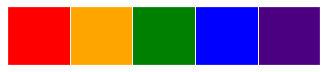

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.style as sty
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_specTrue

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rc('lines', lw=2, c='r')
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

colors = ['red', 'orange', 'green','blue', 'indigo']
sns.palplot(sns.color_palette(colors));
plt.show()

# Reading of Dataset using pandas

In [3]:
death_df = pd.read_csv('1. annual-number-of-deaths-by-cause.csv')
death_by_age_df = pd.read_csv('2. number-of-deaths-by-age-group.csv')
medical_doctor_df = pd.read_csv('3. Medical Doctors Per 10000 population.csv')
country_lists = pd.read_csv('4. ISO 3166_country-and-continent-codes-list-csv.csv')
world_population_df = pd.read_csv('5. World Population.csv')
Health_GDP = pd.read_csv('Health_GDP.csv')

In [4]:
death_df.head() #first dataset

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


In [5]:
country_lists.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


# Dataset Overview

In [6]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        7273 non-null   object 
 1   Code                                          6206 non-null   object 
 2   Year                                          7273 non-null   int64  
 3   Number of executions (Amnesty International)  267 non-null    object 
 4   Meningitis                                    6840 non-null   float64
 5   Alzheimer's disease and other dementias       6840 non-null   float64
 6   Parkinson's disease                           6840 non-null   float64
 7   Nutritional deficiencies                      6840 non-null   float64
 8   Malaria                                       6840 non-null   float64
 9   Drowning                                      6840 non-null   f

# Data Cleaning

## Extract the africa dataset only from the death_df dataframe

In [7]:
# to extract AFrican country
Africa = country_lists[country_lists.Continent_Name == 'Africa']
Africa.head()        

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
6,Africa,AF,"Angola, Republic of",AO,AGO,24.0
22,Africa,AF,"Botswana, Republic of",BW,BWA,72.0
32,Africa,AF,"Burundi, Republic of",BI,BDI,108.0
35,Africa,AF,"Cameroon, Republic of",CM,CMR,120.0


__recode the column name `Three_Letter_Country_Code` to `Code` to be able merge with `Code` colum in death_df__

In [8]:
country_lists.rename(columns = {'Three_Letter_Country_Code' : 'Code'}, inplace=True)

In [9]:
death_df = death_df.merge(country_lists, how = 'inner', on='Code')

__Now, Let us check fo the unique values in `Country_Name` column from our death_df dataframe__

In [10]:
death_df.Country_Name.unique()

array(['Afghanistan, Islamic Republic of', 'Albania, Republic of',
       "Algeria, People's Democratic Republic of", 'American Samoa',
       'Andorra, Principality of', 'Angola, Republic of',
       'Antigua and Barbuda', 'Argentina, Argentine Republic',
       'Armenia, Republic of', 'Australia, Commonwealth of',
       'Austria, Republic of', 'Azerbaijan, Republic of',
       'Bahamas, Commonwealth of the', 'Bahrain, Kingdom of',
       "Bangladesh, People's Republic of", 'Barbados',
       'Belarus, Republic of', 'Belgium, Kingdom of', 'Belize',
       'Benin, Republic of', 'Bermuda', 'Bhutan, Kingdom of',
       'Bolivia, Republic of', 'Bosnia and Herzegovina',
       'Botswana, Republic of', 'Brazil, Federative Republic of',
       'Brunei Darussalam', 'Bulgaria, Republic of', 'Burkina Faso',
       'Burundi, Republic of', 'Cambodia, Kingdom of',
       'Cameroon, Republic of', 'Canada', 'Cape Verde, Republic of',
       'Central African Republic', 'Chad, Republic of',
       'C

__Strip the whitespace with the name name and replace with _ sign__

In [11]:
death_df.columns = death_df.columns.str.replace(' ', '_')

It can be seeen that `Number of executions (Amnesty International)` has so many `NaN` entries, this may be due to stoppage of the type of killings or other factors, so, I will recode NaN values to 0

In [12]:
death_df.columns

Index(['Entity', 'Code', 'Year',
       'Number_of_executions_(Amnesty_International)', 'Meningitis',
       'Alzheimer's_disease_and_other_dementias', 'Parkinson's_disease',
       'Nutritional_deficiencies', 'Malaria', 'Drowning',
       'Interpersonal_violence', 'Maternal_disorders', 'HIV/AIDS',
       'Drug_use_disorders', 'Tuberculosis', 'Cardiovascular_diseases',
       'Lower_respiratory_infections', 'Neonatal_disorders',
       'Alcohol_use_disorders', 'Self', 'Exposure_to_forces_of_nature',
       'Diarrheal_diseases', 'Environmental_heat_and_cold_exposure',
       'Neoplasms', 'Conflict_and_terrorism', 'Diabetes_mellitus',
       'Chronic_kidney_disease', 'Poisonings', 'Protein', 'Terrorism_(deaths)',
       'Road_injuries', 'Chronic_respiratory_diseases',
       'Cirrhosis_and_other_chronic_liver_diseases', 'Digestive_diseases',
       'Fire,_heat,_and_hot_substances', 'Acute_hepatitis', 'Continent_Name',
       'Continent_Code', 'Country_Name', 'Two_Letter_Country_Code',
  

In [13]:
death_df['Number_of_executions_(Amnesty_International)'].unique()

array(['15', '17', '0', '2', '14', '6', '1', nan, '5', '3', '9', '4',
       '10', '470', '>1000', '22', '44', '317', '346', '388', '252',
       '360', '314', '369', '289', '977', '156', '33', '34', '120', '68',
       '129', '169', '61', '26', '88', '7', '8', '11', '18', '>1', '60',
       '30', '135', '36', '326', '87', '143', '102', '69', '27', '82',
       '79', '90', '158', '154', '25', '19', '21', '23', '42', '37', '52',
       '46', '43', '39', '35', '28', '20', '13', '53', '41'], dtype=object)

In [14]:
death_df['Number_of_executions_(Amnesty_International)'].fillna(0, inplace=True)

Next, I will check for duplicated dataset and clean them up

In [15]:
death_df[death_df.duplicated()]

,Entity,Code,Year,Number_of_executions_(Amnesty_International),Meningitis,Alzheimer's_disease_and_other_dementias,Parkinson's_disease,Nutritional_deficiencies,Malaria,Drowning,...,Chronic_respiratory_diseases,Cirrhosis_and_other_chronic_liver_diseases,Digestive_diseases,"Fire,_heat,_and_hot_substances",Acute_hepatitis,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Country_Number


In [16]:
death_df.duplicated().sum()

0

Now, Let us check for total number of missing entries in each column

In [17]:
missing_rows = death_df.isnull()

In [18]:
for col in missing_rows.columns.values.tolist():
    print(col)
    print(missing_rows[col].value_counts())
    print('-'*20)

Entity
False    6140
Name: Entity, dtype: int64
--------------------
Code
False    6140
Name: Code, dtype: int64
--------------------
Year
False    6140
Name: Year, dtype: int64
--------------------
Number_of_executions_(Amnesty_International)
False    6140
Name: Number_of_executions_(Amnesty_International), dtype: int64
--------------------
Meningitis
False    6120
True       20
Name: Meningitis, dtype: int64
--------------------
Alzheimer's_disease_and_other_dementias
False    6120
True       20
Name: Alzheimer's_disease_and_other_dementias, dtype: int64
--------------------
Parkinson's_disease
False    6120
True       20
Name: Parkinson's_disease, dtype: int64
--------------------
Nutritional_deficiencies
False    6120
True       20
Name: Nutritional_deficiencies, dtype: int64
--------------------
Malaria
False    6120
True       20
Name: Malaria, dtype: int64
--------------------
Drowning
False    6120
True       20
Name: Drowning, dtype: int64
--------------------
Interpersonal_vi

Terrorism column has missing values as well, so i will recode that to 0

In [19]:
death_df['Terrorism_(deaths)'].fillna(0, inplace=True)

Next, I will drop the misssing rows, because it affect my analysis later on

In [20]:
death_df.dropna(inplace=True)

Now, I check the dataframe to make sure there is no NaN

Drop unnecessary columns

In [21]:
death_df.drop(labels=['Continent_Name', 'Country_Name', 'Two_Letter_Country_Code', 'Country_Number'], axis = 1, 
        inplace=True)

In [22]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5280 entries, 0 to 6139
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        5280 non-null   object 
 1   Code                                          5280 non-null   object 
 2   Year                                          5280 non-null   int64  
 3   Number_of_executions_(Amnesty_International)  5280 non-null   object 
 4   Meningitis                                    5280 non-null   float64
 5   Alzheimer's_disease_and_other_dementias       5280 non-null   float64
 6   Parkinson's_disease                           5280 non-null   float64
 7   Nutritional_deficiencies                      5280 non-null   float64
 8   Malaria                                       5280 non-null   float64
 9   Drowning                                      5280 non-null   f

Next, I will check the entries in each column

In [23]:
for col in death_df:
    print(col)
    print(death_df[col].unique())
    print('-'*20)

Entity
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' "Cote d'Ivoire" 'Croatia' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Ecuador' 'Egypt'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guam' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'Malaysia' 

# Exploratory Data Analysis (EDA)

In [24]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5280 entries, 0 to 6139
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        5280 non-null   object 
 1   Code                                          5280 non-null   object 
 2   Year                                          5280 non-null   int64  
 3   Number_of_executions_(Amnesty_International)  5280 non-null   object 
 4   Meningitis                                    5280 non-null   float64
 5   Alzheimer's_disease_and_other_dementias       5280 non-null   float64
 6   Parkinson's_disease                           5280 non-null   float64
 7   Nutritional_deficiencies                      5280 non-null   float64
 8   Malaria                                       5280 non-null   float64
 9   Drowning                                      5280 non-null   f

I will create three column to find the following
- `Total_Death_Through_Health_Issue`
- `Total_Death_by_others`
- `Percentage_Death_by_Death`

In [25]:
death_df['Total_Death_Through_Health_Issue'] = death_df['Acute_hepatitis'] + death_df['Digestive_diseases'] + death_df.Cirrhosis_and_other_chronic_liver_diseases + death_df.Chronic_kidney_disease + death_df.Protein + death_df.Chronic_respiratory_diseases + death_df.Neoplasms + death_df.Diarrheal_diseases + death_df.Neonatal_disorders + death_df.Lower_respiratory_infections + death_df.Cardiovascular_diseases + death_df['HIV/AIDS'] + death_df.Maternal_disorders + death_df.Nutritional_deficiencies + death_df["Parkinson's_disease"] +death_df.Meningitis

In [26]:
death_df['Death_from_Others'] = death_df['Terrorism_(deaths)'] + death_df['Fire,_heat,_and_hot_substances'] + death_df.Drowning + death_df.Self + death_df.Drug_use_disorders + death_df.Interpersonal_violence 

In [27]:
death_df['%_Death_from_health'] = (death_df.Total_Death_Through_Health_Issue/(death_df.Total_Death_Through_Health_Issue+death_df.Death_from_Others))*100

In [28]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5280 entries, 0 to 6139
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        5280 non-null   object 
 1   Code                                          5280 non-null   object 
 2   Year                                          5280 non-null   int64  
 3   Number_of_executions_(Amnesty_International)  5280 non-null   object 
 4   Meningitis                                    5280 non-null   float64
 5   Alzheimer's_disease_and_other_dementias       5280 non-null   float64
 6   Parkinson's_disease                           5280 non-null   float64
 7   Nutritional_deficiencies                      5280 non-null   float64
 8   Malaria                                       5280 non-null   float64
 9   Drowning                                      5280 non-null   f

Next, I will create a dataframe for Death through health issues

In [29]:
Health_df = death_df[['Year', 'Acute_hepatitis', 'Digestive_diseases', 'Cirrhosis_and_other_chronic_liver_diseases', 'Chronic_kidney_disease','Protein', 'Chronic_respiratory_diseases', 'Neoplasms', 'Diarrheal_diseases', 'Neonatal_disorders', 'Lower_respiratory_infections', 'Cardiovascular_diseases', 'HIV/AIDS', 'Maternal_disorders',
                'Nutritional_deficiencies', "Parkinson's_disease", 'Meningitis', 'Total_Death_Through_Health_Issue']]

__Group the `Health_df` by year and find the total number of death in each each for each field (Column)__

In [30]:
Health_df.set_index('Year')   #set the Year column as index column
Health_df = Health_df.groupby('Year')['Acute_hepatitis', 'Digestive_diseases', 'Cirrhosis_and_other_chronic_liver_diseases', 
                                      'Chronic_kidney_disease','Protein', 'Chronic_respiratory_diseases', 'Neoplasms', 
                                      'Diarrheal_diseases', 'Neonatal_disorders', 'Lower_respiratory_infections', 
                                      'Cardiovascular_diseases', 'HIV/AIDS', 'Maternal_disorders', 'Nutritional_deficiencies',
                                      "Parkinson's_disease", 'Meningitis', 'Total_Death_Through_Health_Issue'].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_8668\3392708648.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Health_df = Health_df.groupby('Year')['Acute_hepatitis', 'Digestive_diseases', 'Cirrhosis_and_other_chronic_liver_diseases',


In [31]:
# Check this dataset

Health_df.head()

,Acute_hepatitis,Digestive_diseases,Cirrhosis_and_other_chronic_liver_diseases,Chronic_kidney_disease,Protein,Chronic_respiratory_diseases,Neoplasms,Diarrheal_diseases,Neonatal_disorders,Lower_respiratory_infections,Cardiovascular_diseases,HIV/AIDS,Maternal_disorders,Nutritional_deficiencies,Parkinson's_disease,Meningitis,Total_Death_Through_Health_Issue
Year,,,,,,,,,,,,,,,,,
1990,165526.0,1709429.0,936474.0,544963.0,631537.0,2947636.0,5064022.0,2832927.0,2915215.0,3172706.0,10932086.0,299726.0,296632.0,729123.0,129779.0,423997.0,33731778.0
1991,164459.0,1731005.0,949963.0,555830.0,606838.0,2998844.0,5170758.0,2844772.0,2887978.0,3138085.0,11089769.0,387045.0,292640.0,701831.0,133019.0,420900.0,34073736.0
1992,162871.0,1754965.0,964623.0,570035.0,582289.0,3053665.0,5288468.0,2817972.0,2865551.0,3113776.0,11304602.0,489116.0,293492.0,673878.0,136451.0,419058.0,34490812.0
1993,161084.0,1786378.0,986664.0,583759.0,560673.0,3104507.0,5439767.0,2748155.0,2841426.0,3079352.0,11641655.0,606089.0,288182.0,647936.0,140876.0,413684.0,35030187.0
1994,158609.0,1812003.0,1006642.0,599030.0,541517.0,3129804.0,5557396.0,2693576.0,2815615.0,3039259.0,11857389.0,733782.0,287505.0,624333.0,144282.0,406747.0,35407489.0


Now, I will vizualise each column using line graph (because they are series dataset)

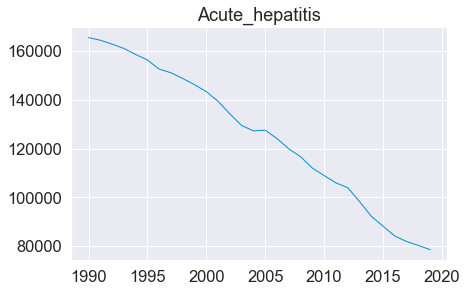

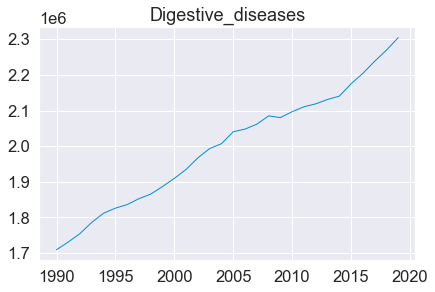

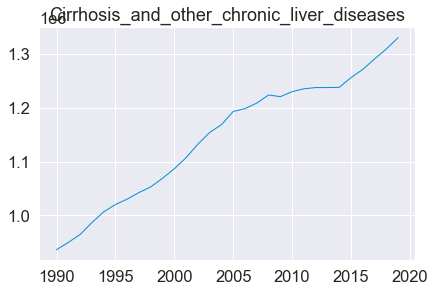

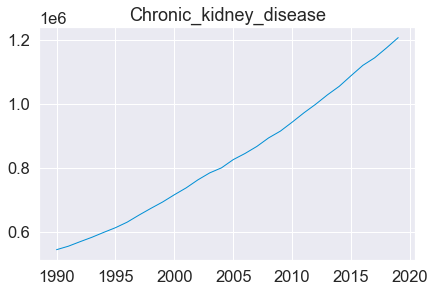

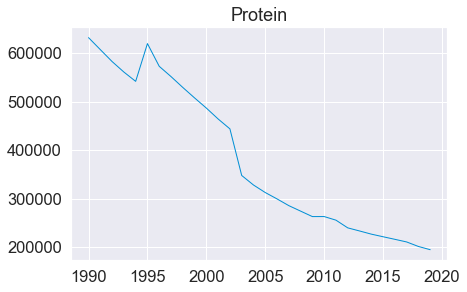

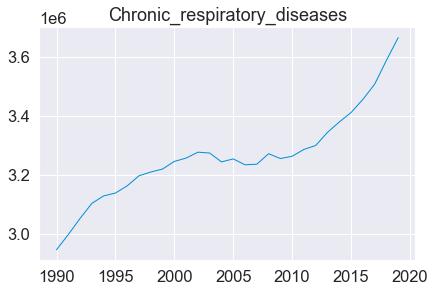

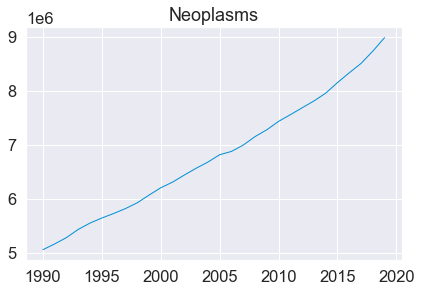

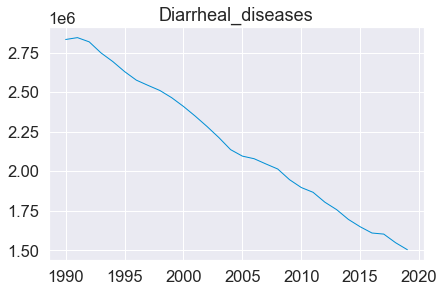

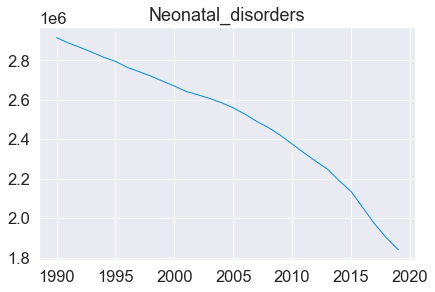

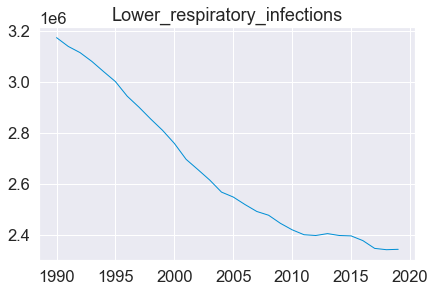

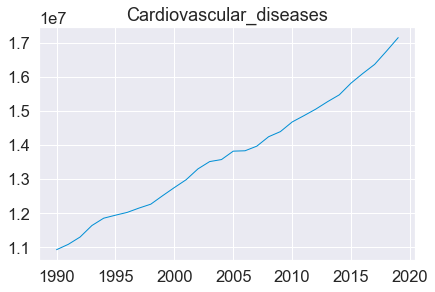

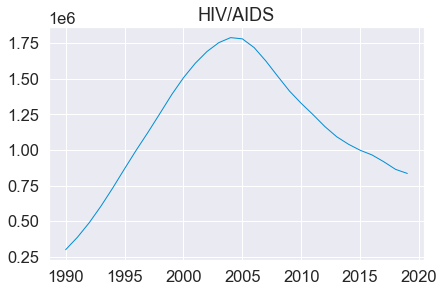

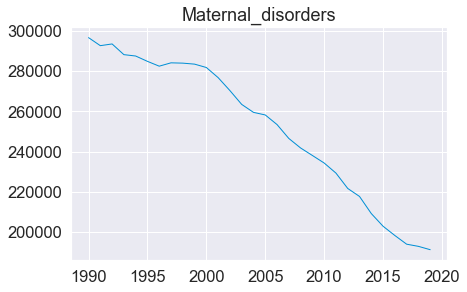

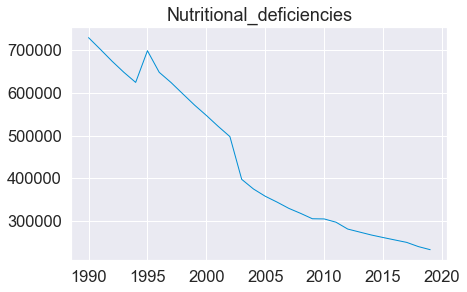

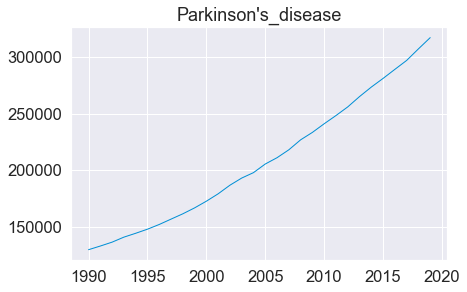

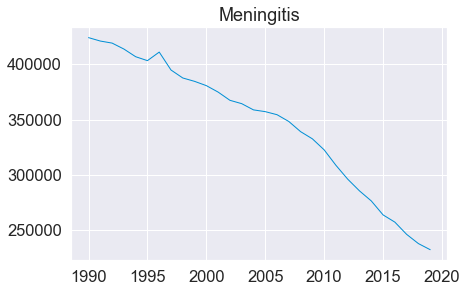

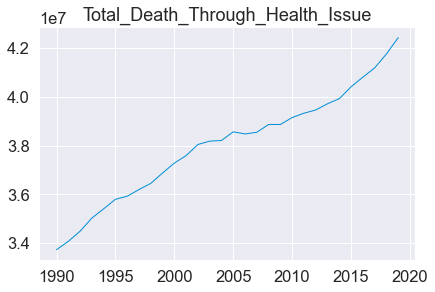

In [32]:
# Plotting continous features 
continous_features = Health_df.select_dtypes(['float64']).columns.to_list()

for cont_feature in continous_features: 
    plt.figure()
    ax = plt.plot(Health_df[cont_feature])
    plt.title(cont_feature)
    
plt.show()

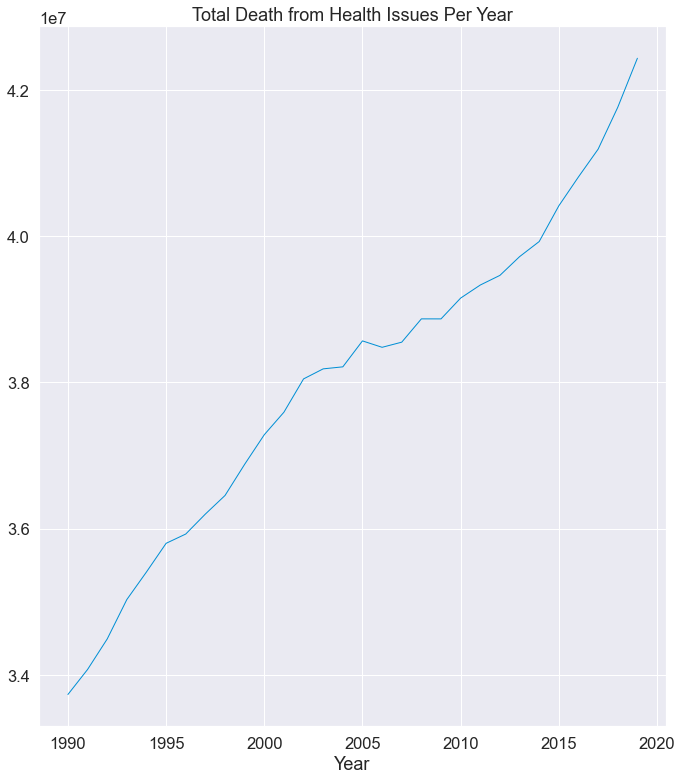

In [33]:
plt.figure(figsize= (10, 12))
plt.title('Total Death from Health Issues Per Year')
Health_df.Total_Death_Through_Health_Issue.plot();

- __Summary of the Graph__
1. The Total death increased rapidly from 1990 to 2003
2. And then decreaes from that year (2003)

The graph is not evident enough to conclude that the health sector of Africa has been doing well, because there is need to check these changes with the population data. This will help us understand more weather the death has been decreasing compare to the population

+ However, deaths through `Digestive_diseases` has been on increase since 1990 reaching peak of about 400,000 death in 2020
+ The same goes to `Cirrhosis` reaching 260, 000 deaths in 2020 and death through `Chronic Kidney Disease` having more than 160, 000 deaths
+ There is improvement in death through protein. Total deaths through protein in 1990 was about 220, 000 whereas, it had decreased to 100, 000 in 2020
+ `Chronic Respiratory Diseases`, having total death h=of about 160, 000 in 1990 reached about 220, 000 deaths in 2020. This indicate that there is need for improvement in this area.
+ Combat of `Neonatal Disease`, `Lower Respiratory Disease`, `Hiv/Aids`, `Maternal Disorder`, `Nutritional Deficiencies`, `Meningtis` had been improved over the years

__Once again, this analysis is not enough to make conclusion that the health sector has improve over the year, so I will compare above study with the population__

In [34]:
world_population_df

,Entity,Code,Year,Population (historical estimates)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166
...,...,...,...,...
56908,Zimbabwe,ZWE,2017,14751101
56909,Zimbabwe,ZWE,2018,15052191
56910,Zimbabwe,ZWE,2019,15354606
56911,Zimbabwe,ZWE,2020,15669663


In [35]:
Population = world_population_df.merge(country_lists, how = 'inner', on='Code')
Population.head()

,Entity,Code,Year,Population (historical estimates),Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Country_Number
0,Afghanistan,AFG,-10000,14737,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
1,Afghanistan,AFG,-9000,20405,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
2,Afghanistan,AFG,-8000,28253,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
3,Afghanistan,AFG,-7000,39120,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
4,Afghanistan,AFG,-6000,54166,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0


__Extract Africa dataset__

In [36]:
Population = Population[Population.Continent_Name == 'Africa']

In [37]:
Population

,Entity,Code,Year,Population (historical estimates),Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Country_Number
518,Algeria,DZA,-10000,12090,Africa,AF,"Algeria, People's Democratic Republic of",DZ,12.0
519,Algeria,DZA,-9000,20150,Africa,AF,"Algeria, People's Democratic Republic of",DZ,12.0
520,Algeria,DZA,-8000,33583,Africa,AF,"Algeria, People's Democratic Republic of",DZ,12.0
521,Algeria,DZA,-7000,55973,Africa,AF,"Algeria, People's Democratic Republic of",DZ,12.0
522,Algeria,DZA,-6000,93289,Africa,AF,"Algeria, People's Democratic Republic of",DZ,12.0
...,...,...,...,...,...,...,...,...,...
53915,Zimbabwe,ZWE,2017,14751101,Africa,AF,"Zimbabwe, Republic of",ZW,716.0
53916,Zimbabwe,ZWE,2018,15052191,Africa,AF,"Zimbabwe, Republic of",ZW,716.0
53917,Zimbabwe,ZWE,2019,15354606,Africa,AF,"Zimbabwe, Republic of",ZW,716.0
53918,Zimbabwe,ZWE,2020,15669663,Africa,AF,"Zimbabwe, Republic of",ZW,716.0


__Drop unnecessary columns__

In [38]:
Population.drop(columns=['Continent_Name', 'Continent_Code', 
                         'Two_Letter_Country_Code', 'Country_Number', 'Country_Name'], 
                inplace=True)

__Extract data from the year 1990 to 2020__

In [39]:
Population = Population[Population['Population (historical estimates)'] >=1]
Population = Population[Population['Year'] >= 1990]

In [40]:
Population.head()

,Entity,Code,Year,Population (historical estimates)
745,Algeria,DZA,1990,25518074
746,Algeria,DZA,1991,26133906
747,Algeria,DZA,1992,26748302
748,Algeria,DZA,1993,27354326
749,Algeria,DZA,1994,27937006


In [41]:
Population.set_index('Year', inplace=True)

In [42]:
Population = Population.groupby('Year')['Population (historical estimates)'].sum()

__Next, I will check the total sum of Africa Populatipon for each year and vizualise__

In [43]:
Population

Year
1990     638157571
1991     655040869
1992     671931834
1993     689140286
1994     706488557
1995     724331972
1996     742765067
1997     761224818
1998     779908311
1999     799099611
2000     818952374
2001     839464127
2002     860611762
2003     882349569
2004     904781595
2005     927898412
2006     951740562
2007     976461747
2008    1001981577
2009    1028200528
2010    1055233717
2011    1082676070
2012    1110797495
2013    1140180888
2014    1170299297
2015    1201108186
2016    1232111820
2017    1263333997
2018    1295265310
2019    1327701380
2020    1360677453
2021    1393676724
Name: Population (historical estimates), dtype: int64

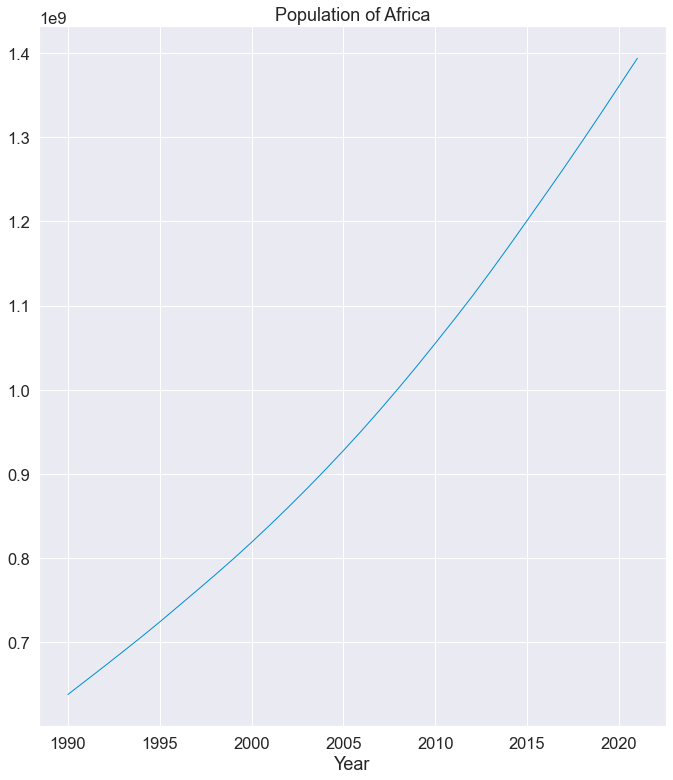

In [44]:
plt.figure(figsize=(10, 12))
plt.title('Population of Africa')
Population.plot();

It can be seen from the figure above that the population is increasing as by year

Now, Let us compare the relationship bwbetween death over the years and population over the same years

In [45]:
Death_Per_Population = Health_df.merge(Population, how = 'inner', on = 'Year')

In [46]:
Death_Per_Population.head()

,Acute_hepatitis,Digestive_diseases,Cirrhosis_and_other_chronic_liver_diseases,Chronic_kidney_disease,Protein,Chronic_respiratory_diseases,Neoplasms,Diarrheal_diseases,Neonatal_disorders,Lower_respiratory_infections,Cardiovascular_diseases,HIV/AIDS,Maternal_disorders,Nutritional_deficiencies,Parkinson's_disease,Meningitis,Total_Death_Through_Health_Issue,Population (historical estimates)
Year,,,,,,,,,,,,,,,,,,
1990,165526.0,1709429.0,936474.0,544963.0,631537.0,2947636.0,5064022.0,2832927.0,2915215.0,3172706.0,10932086.0,299726.0,296632.0,729123.0,129779.0,423997.0,33731778.0,638157571
1991,164459.0,1731005.0,949963.0,555830.0,606838.0,2998844.0,5170758.0,2844772.0,2887978.0,3138085.0,11089769.0,387045.0,292640.0,701831.0,133019.0,420900.0,34073736.0,655040869
1992,162871.0,1754965.0,964623.0,570035.0,582289.0,3053665.0,5288468.0,2817972.0,2865551.0,3113776.0,11304602.0,489116.0,293492.0,673878.0,136451.0,419058.0,34490812.0,671931834
1993,161084.0,1786378.0,986664.0,583759.0,560673.0,3104507.0,5439767.0,2748155.0,2841426.0,3079352.0,11641655.0,606089.0,288182.0,647936.0,140876.0,413684.0,35030187.0,689140286
1994,158609.0,1812003.0,1006642.0,599030.0,541517.0,3129804.0,5557396.0,2693576.0,2815615.0,3039259.0,11857389.0,733782.0,287505.0,624333.0,144282.0,406747.0,35407489.0,706488557


In [47]:
Death_Per_Population.columns

Index(['Acute_hepatitis', 'Digestive_diseases',
       'Cirrhosis_and_other_chronic_liver_diseases', 'Chronic_kidney_disease',
       'Protein', 'Chronic_respiratory_diseases', 'Neoplasms',
       'Diarrheal_diseases', 'Neonatal_disorders',
       'Lower_respiratory_infections', 'Cardiovascular_diseases', 'HIV/AIDS',
       'Maternal_disorders', 'Nutritional_deficiencies', 'Parkinson's_disease',
       'Meningitis', 'Total_Death_Through_Health_Issue',
       'Population (historical estimates)'],
      dtype='object')

In [48]:
Death_Per_Population = Death_Per_Population[['Population (historical estimates)', 'Total_Death_Through_Health_Issue']]
Death_Per_Population['Death_per_year_in_population'] = Death_Per_Population['Total_Death_Through_Health_Issue'] / Death_Per_Population['Population (historical estimates)'] *100
Death_Per_Population.head()

,Population (historical estimates),Total_Death_Through_Health_Issue,Death_per_year_in_population
Year,,,
1990,638157571,33731778.0,5.285807
1991,655040869,34073736.0,5.201773
1992,671931834,34490812.0,5.133082
1993,689140286,35030187.0,5.083172
1994,706488557,35407489.0,5.011757


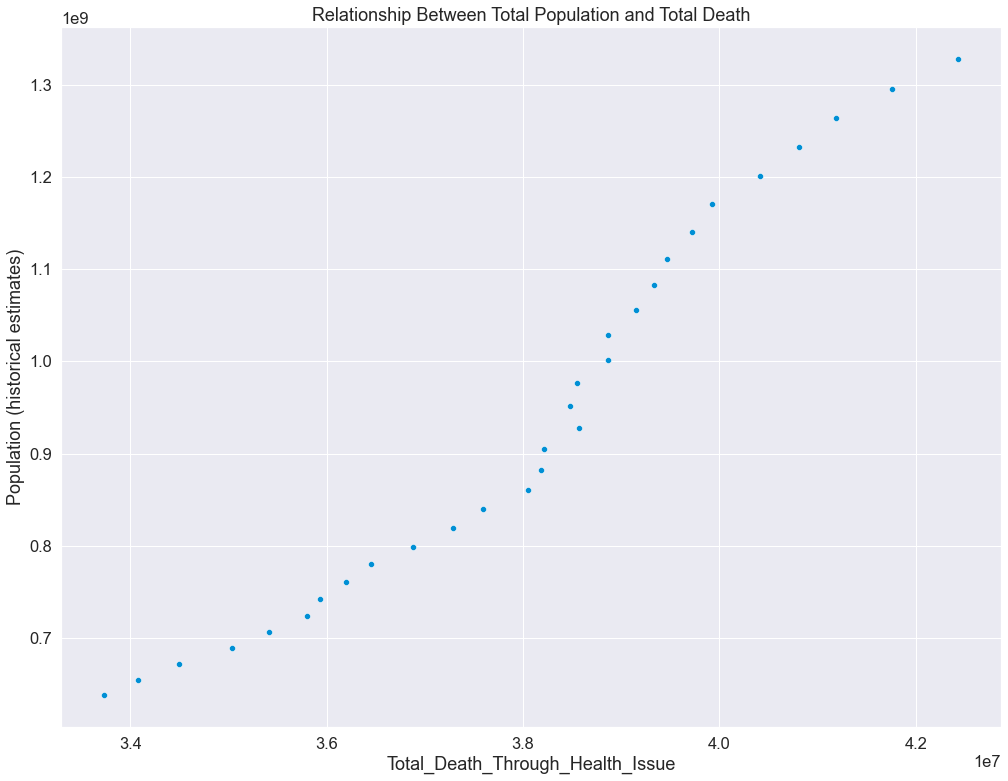

In [49]:
plt.figure(figsize = (15, 12))
plt.title('Relationship Between Total Population and Total Death')
sns.scatterplot(y = Death_Per_Population['Population (historical estimates)'], 
                x = Death_Per_Population['Total_Death_Through_Health_Issue'],
               data = Death_Per_Population);

So, as the Population is increasing, total death is on increase as well. Which this, I can say that there's need to improve our health sector in order to carter for the increase in our population

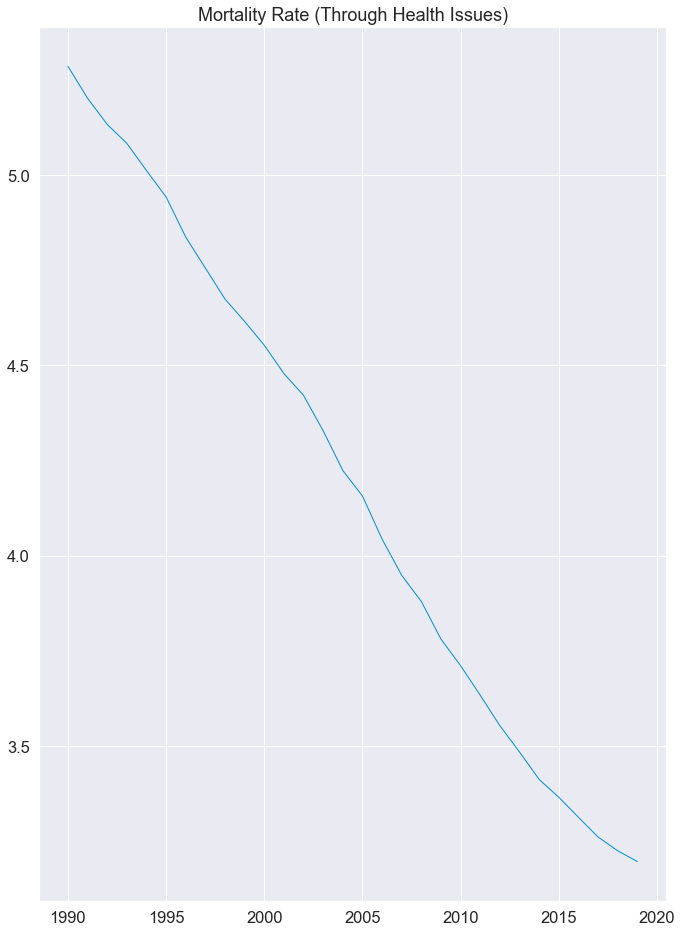

In [50]:
plt.figure(figsize=(10, 15))
plt.title('Mortality Rate (Through Health Issues)')
plt.plot(Death_Per_Population.index, Death_Per_Population['Death_per_year_in_population']);

Over the years, the death through health issues has been decreasing, which is something impressive

__Next, I will look into death by age__

In [51]:
death_by_age_df = death_by_age_df.merge(country_lists, how = 'inner', on='Code')

In [52]:
death_by_age_df.head()

,Entity,Code,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Country_Number
0,Afghanistan,AFG,1990,34681,40624,22968,5642,78170,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
1,Afghanistan,AFG,1991,35271,41414,26523,6433,83035,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
2,Afghanistan,AFG,1992,35694,41829,30000,6854,93859,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
3,Afghanistan,AFG,1993,36433,42598,32339,7206,106537,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
4,Afghanistan,AFG,1994,37460,43923,36817,8106,115334,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0


In [53]:
death_by_age_df = death_by_age_df[death_by_age_df.Continent_Name =='Africa']

In [54]:
death_by_age_df.drop(columns=['Code', 'Continent_Name', 'Continent_Code', 'Country_Name', 
                                  'Two_Letter_Country_Code', 'Country_Number'], inplace=True)

In [55]:
death_by_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 60 to 6119
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   1620 non-null   object
 1   Year                     1620 non-null   int64 
 2   Deaths 70+ years         1620 non-null   int64 
 3   Deaths 50-69 years       1620 non-null   int64 
 4   Deaths Age: 15-49 years  1620 non-null   int64 
 5   Deaths 5-14 years        1620 non-null   int64 
 6   Deaths Under 5           1620 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 101.2+ KB


__Group the data by Year__

In [56]:
death_by_age_df.set_index('Year')
Death_by_age_group_df = death_by_age_df.groupby('Year')['Deaths 70+ years', 'Deaths 50-69 years', 'Deaths Age: 15-49 years', 'Deaths 5-14 years', 'Deaths Under 5'].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_8668\1426487869.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Death_by_age_group_df = death_by_age_df.groupby('Year')['Deaths 70+ years', 'Deaths 50-69 years', 'Deaths Age: 15-49 years', 'Deaths 5-14 years', 'Deaths Under 5'].sum()


__Now, Let us view the distribrition of death by age group__

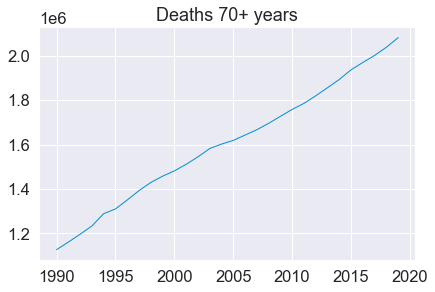

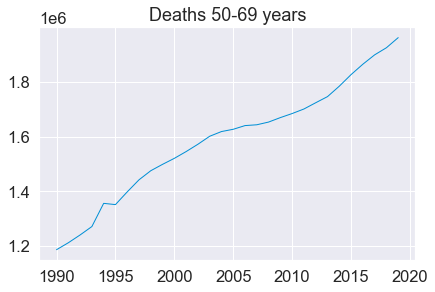

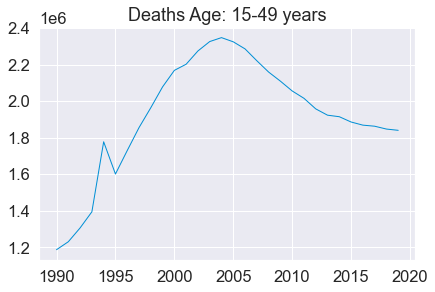

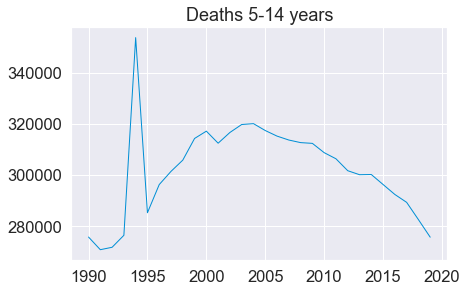

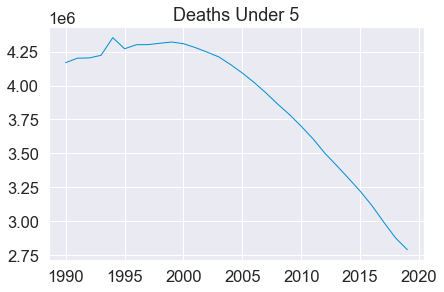

In [57]:
# Plotting continous features 
continous_features = Death_by_age_group_df.select_dtypes(['int64']).columns.to_list()
continous_features
for cont_feature in continous_features: 
    plt.figure()
    ax = plt.plot(Death_by_age_group_df[cont_feature])
    plt.title(cont_feature)

- __SUMMARY__

- Over the years, the death of 70+ year age group has been on increase, which which can be affected by many factors.
- Age group 50-69 as well, has been on increase over the years
- The death of Youth (15-49 years) has been decreasing between 2005 and 2020 which is quite impressive for national growth
- Age group 5-14 years as well as been in decrease after 2004
- The most impressive ones infant deaths, which has been on decrease tremendously. Mernal Disorder greatly has effect on the infact death.

In [58]:
Death_by_age_group_df = Death_by_age_group_df.merge(Death_Per_Population, how='inner', on='Year')

In [59]:
Death_by_age_group_df.drop(columns=['Total_Death_Through_Health_Issue', 'Death_per_year_in_population'], inplace=True)

Is there any relationship between death of each age group

In [60]:
Death_by_age_group_df.corr()

,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5,Population (historical estimates)
Deaths 70+ years,1.000000,0.993800,0.463366,0.032847,-0.890297,0.992063
Deaths 50-69 years,0.993800,1.000000,0.536326,0.097994,-0.848488,0.974647
Deaths Age: 15-49 years,0.463366,0.536326,1.000000,0.736747,-0.016696,0.353837
Deaths 5-14 years,0.032847,0.097994,0.736747,1.000000,0.335042,-0.062301
Deaths Under 5,-0.890297,-0.848488,-0.016696,0.335042,1.000000,-0.939093
Population (historical estimates),0.992063,0.974647,0.353837,-0.062301,-0.939093,1.000000


- __Summary__

Apparently, as the Population is on increase, the deaths (age group) as well are on increase except for age group 4-14 and under 5 years.

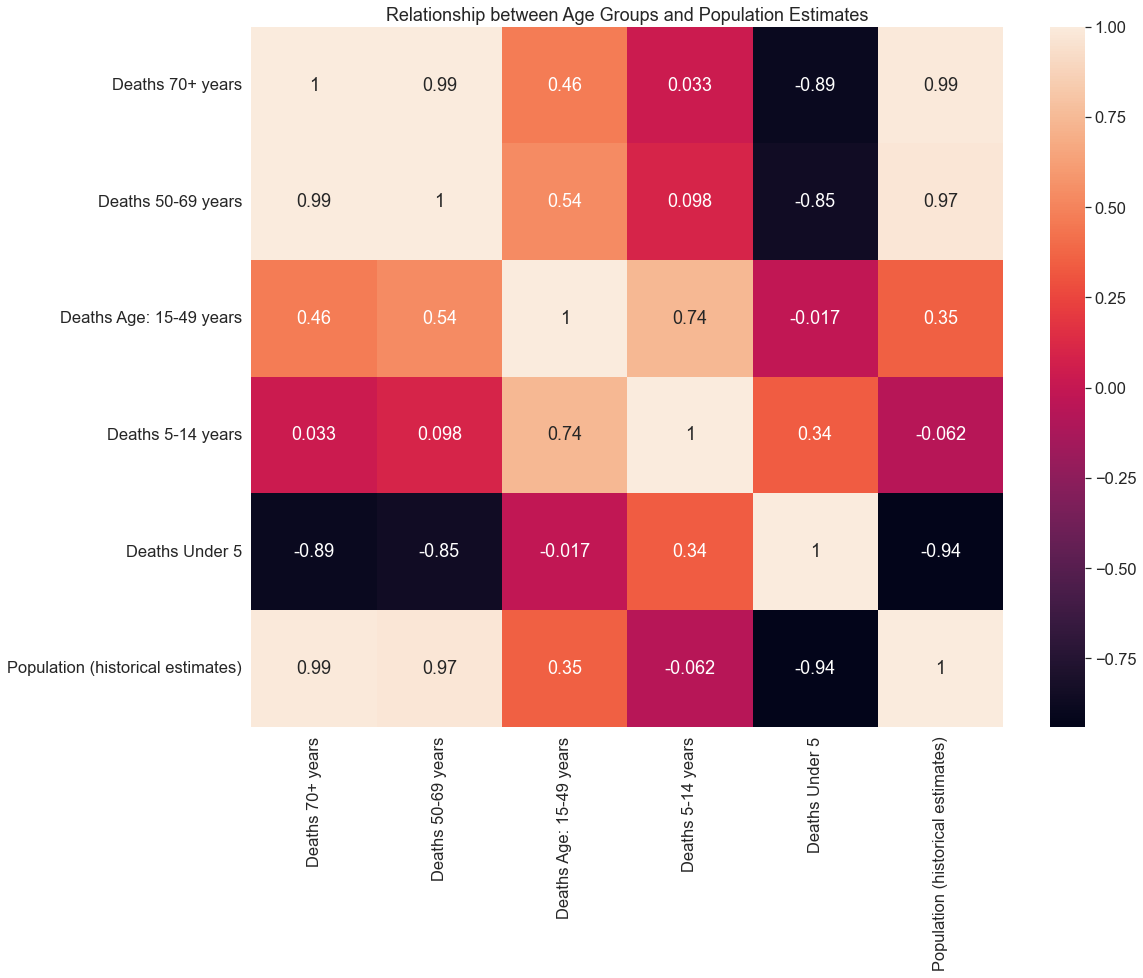

In [61]:
plt.figure(figsize = (15, 12))
plt.title('Relationship between Age Groups and Population Estimates')
sns.heatmap(Death_by_age_group_df.corr(), annot=True);

Now, Let us check how the GDP has been affecting death over the years

In [62]:
Health_GDP.head() 

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),6.252428,6.390627,5.969416,6.635666,6.710734,6.528098,6.492506,...,6.562794,6.565689,6.152063,6.482263,6.390654,6.317654,6.286829,6.266386,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),NaN,NaN,9.443390,8.941258,9.808474,9.948290,10.622766,...,7.897176,8.805941,9.528871,10.105348,11.818562,12.620817,14.126743,13.242202,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),3.771302,3.770256,3.387634,4.681099,4.481882,4.277262,4.139578,...,3.505065,3.621925,3.614749,3.834676,3.811248,3.789624,3.393160,3.366100,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,...,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360,NaN,NaN


In [63]:
Health_GDP = pd.read_csv('Health_GDP.csv')

In [64]:
Health_GDP.set_index('Country Name', inplace=True)

In [65]:
Health_GDP.rename({'Country Code': 'Code'}, axis = 1, inplace = True)

In [66]:
Health_GDP.head()

,Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),6.252428,6.390627,5.969416,6.635666,6.710734,6.528098,6.492506,6.468483,...,6.562794,6.565689,6.152063,6.482263,6.390654,6.317654,6.286829,6.266386,NaN,NaN
Afghanistan,AFG,Current health expenditure (% of GDP),NaN,NaN,9.443390,8.941258,9.808474,9.948290,10.622766,9.904675,...,7.897176,8.805941,9.528871,10.105348,11.818562,12.620817,14.126743,13.242202,NaN,NaN
Africa Western and Central,AFW,Current health expenditure (% of GDP),3.771302,3.770256,3.387634,4.681099,4.481882,4.277262,4.139578,3.908460,...,3.505065,3.621925,3.614749,3.834676,3.811248,3.789624,3.393160,3.366100,NaN,NaN
Angola,AGO,Current health expenditure (% of GDP),1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,2.974388,...,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360,NaN,NaN


In [67]:
Health_GDP = Health_GDP.merge(country_lists, how = 'inner', on = 'Code')

In [68]:
Health_GDP = Health_GDP[Health_GDP.Continent_Name == 'Africa']

In [69]:
Health_GDP.drop(columns=['Continent_Code', 
                         'Two_Letter_Country_Code', 'Country_Number', 'Country_Name'], 
                inplace=True)

In [70]:
Health_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2 to 214
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            54 non-null     object 
 1   Indicator Name  54 non-null     object 
 2   2000            51 non-null     float64
 3   2001            51 non-null     float64
 4   2002            51 non-null     float64
 5   2003            51 non-null     float64
 6   2004            51 non-null     float64
 7   2005            51 non-null     float64
 8   2006            51 non-null     float64
 9   2007            51 non-null     float64
 10  2008            51 non-null     float64
 11  2009            51 non-null     float64
 12  2010            52 non-null     float64
 13  2011            52 non-null     float64
 14  2012            51 non-null     float64
 15  2013            51 non-null     float64
 16  2014            51 non-null     float64
 17  2015            51 non-null     floa

In [71]:
np.arange(2000, 2022, 1)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [72]:
Avg_Health_GDP = Health_GDP.groupby('Continent_Name')['2000', '2001', '2002', '2003', '2004', '2005', 
                                                      '2006', '2007', '2008', '2009', '2010',
                                                      '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', 
                                                      '2019', '2020', '2021'].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_8668\3528575351.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Avg_Health_GDP = Health_GDP.groupby('Continent_Name')['2000', '2001', '2002', '2003', '2004', '2005',


In [73]:
Avg_Health_GDP = Avg_Health_GDP.transpose()

In [74]:
Avg_Health_GDP

Continent_Name,Africa
2000,237.583237
2001,244.784113
2002,250.445193
2003,261.313125
2004,271.459096
2005,268.105775
2006,267.711643
2007,268.560186
2008,261.934204
2009,275.750805


In [75]:
Avg_Health_GDP = Avg_Health_GDP.drop(['2021', '2020'])
Avg_Health_GDP

Continent_Name,Africa
2000,237.583237
2001,244.784113
2002,250.445193
2003,261.313125
2004,271.459096
2005,268.105775
2006,267.711643
2007,268.560186
2008,261.934204
2009,275.750805


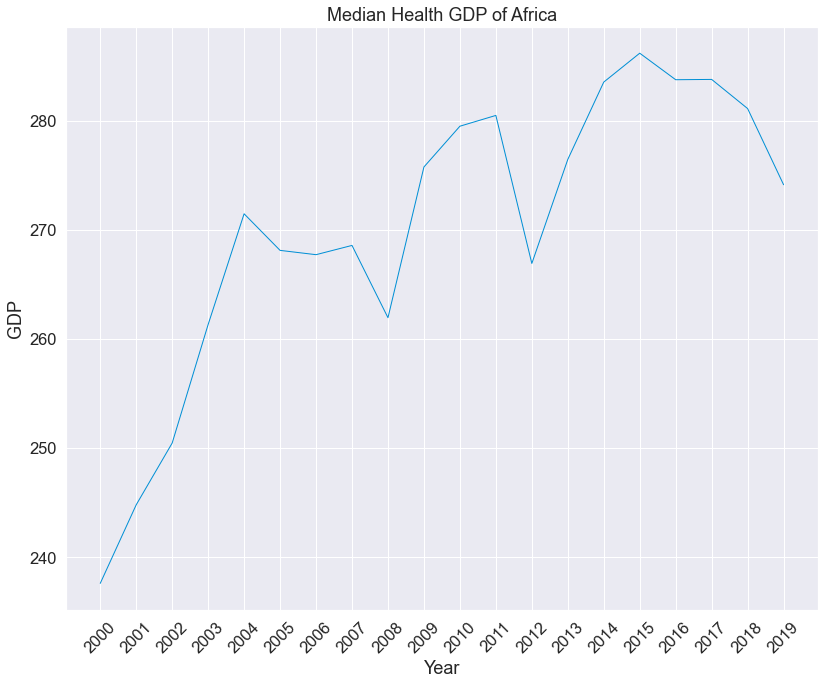

In [76]:
plt.figure(figsize=(12, 10))
plt.plot(Avg_Health_GDP)
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.ylabel('GDP')
plt.title("Median Health GDP of Africa");

GDP increases betwenn 200 and 2004, and hits behavior has been changing over the period. Let us get better understanding of this with health and Population later

In [77]:
Avg_Health_GDP.rename_axis('Year', index=0, inplace=True)

In [78]:
Avg_Health_GDP.to_csv('Avg_Health_GDP.csv')

In [79]:
Avg_Health_GDP = pd.read_csv('Avg_Health_GDP.csv')
Avg_Health_GDP

,Year,Africa
0,2000,237.583237
1,2001,244.784113
2,2002,250.445193
3,2003,261.313125
4,2004,271.459096
5,2005,268.105775
6,2006,267.711643
7,2007,268.560186
8,2008,261.934204
9,2009,275.750805


In [80]:
Pop_Death_AvgGDP = Death_Per_Population.merge(Avg_Health_GDP, how = 'inner', on = 'Year') 

In [81]:
Pop_Death_AvgGDP

,Year,Population (historical estimates),Total_Death_Through_Health_Issue,Death_per_year_in_population,Africa
0,2000,818952374,37284827.0,4.552747,237.583237
1,2001,839464127,37592625.0,4.478169,244.784113
2,2002,860611762,38048066.0,4.421049,250.445193
3,2003,882349569,38185431.0,4.327699,261.313125
4,2004,904781595,38213012.0,4.223452,271.459096
5,2005,927898412,38567839.0,4.156472,268.105775
6,2006,951740562,38480221.0,4.043142,267.711643
7,2007,976461747,38550405.0,3.947969,268.560186
8,2008,1001981577,38869127.0,3.879226,261.934204
9,2009,1028200528,38868774.0,3.780272,275.750805


In [82]:
Pop_Death_AvgGDP.rename({'Africa': 'Average_GDP'}, axis=1, inplace=True)

In [83]:
Pop_Death_AvgGDP

,Year,Population (historical estimates),Total_Death_Through_Health_Issue,Death_per_year_in_population,Average_GDP
0,2000,818952374,37284827.0,4.552747,237.583237
1,2001,839464127,37592625.0,4.478169,244.784113
2,2002,860611762,38048066.0,4.421049,250.445193
3,2003,882349569,38185431.0,4.327699,261.313125
4,2004,904781595,38213012.0,4.223452,271.459096
5,2005,927898412,38567839.0,4.156472,268.105775
6,2006,951740562,38480221.0,4.043142,267.711643
7,2007,976461747,38550405.0,3.947969,268.560186
8,2008,1001981577,38869127.0,3.879226,261.934204
9,2009,1028200528,38868774.0,3.780272,275.750805


I would like to recoomend that African country should invest more in Health sector to combat health issues very well.

In [84]:
Pop_Death_AvgGDP.set_index('Year', inplace=True)

In [85]:
Pop_Death_AvgGDP.corr()

,Population (historical estimates),Total_Death_Through_Health_Issue,Death_per_year_in_population,Average_GDP
Population (historical estimates),1.000000,0.976604,-0.985050,0.800703
Total_Death_Through_Health_Issue,0.976604,1.000000,-0.930922,0.731380
Death_per_year_in_population,-0.985050,-0.930922,1.000000,-0.856782
Average_GDP,0.800703,0.731380,-0.856782,1.000000


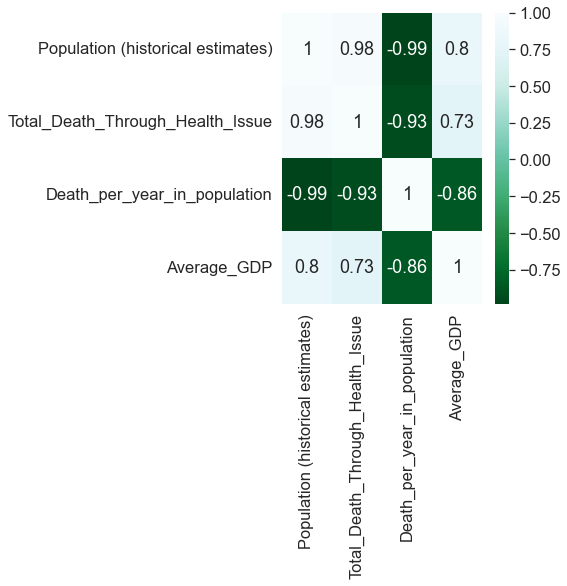

In [86]:
plt.figure(figsize = (4, 5))
sns.heatmap(Pop_Death_AvgGDP.corr(), annot=True, cmap='BuGn_r');

In [87]:
Pop_Death_AvgGDP

,Population (historical estimates),Total_Death_Through_Health_Issue,Death_per_year_in_population,Average_GDP
Year,,,,
2000,818952374,37284827.0,4.552747,237.583237
2001,839464127,37592625.0,4.478169,244.784113
2002,860611762,38048066.0,4.421049,250.445193
2003,882349569,38185431.0,4.327699,261.313125
2004,904781595,38213012.0,4.223452,271.459096
2005,927898412,38567839.0,4.156472,268.105775
2006,951740562,38480221.0,4.043142,267.711643
2007,976461747,38550405.0,3.947969,268.560186
2008,1001981577,38869127.0,3.879226,261.934204


In [88]:
Pop_Death_AvgGDP.columns

Index(['Population (historical estimates)', 'Total_Death_Through_Health_Issue',
       'Death_per_year_in_population', 'Average_GDP'],
      dtype='object')

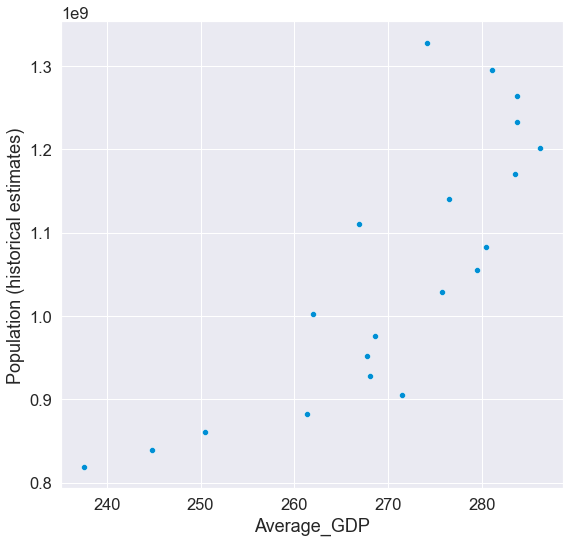

In [89]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = Pop_Death_AvgGDP.Average_GDP, y = Pop_Death_AvgGDP['Population (historical estimates)']);

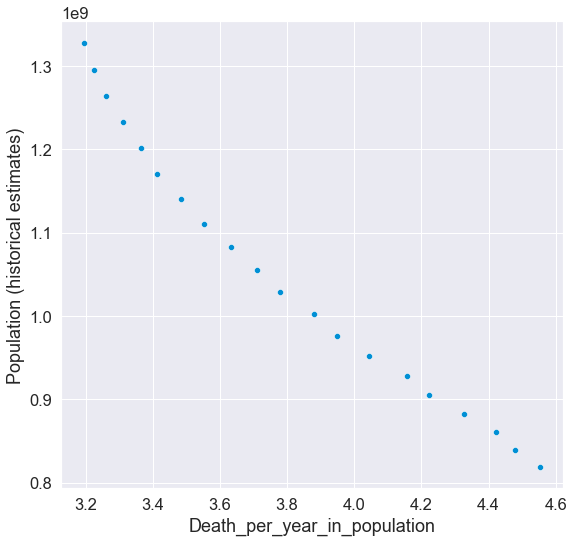

In [90]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = Pop_Death_AvgGDP.Death_per_year_in_population, y = Pop_Death_AvgGDP['Population (historical estimates)']);

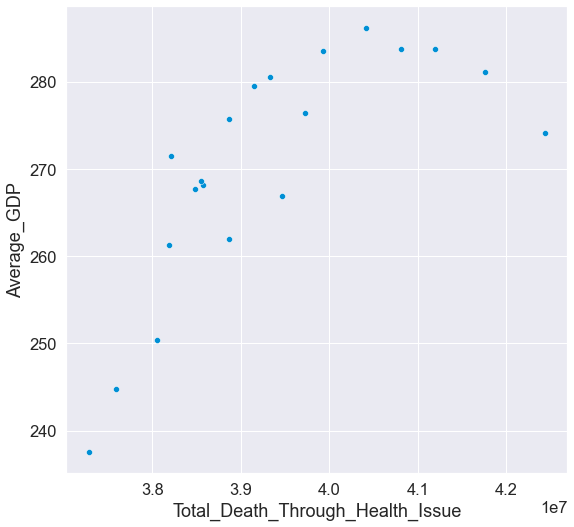

In [91]:
plt.figure(figsize=(8,8))
sns.scatterplot(y = Pop_Death_AvgGDP.Average_GDP, x = Pop_Death_AvgGDP['Total_Death_Through_Health_Issue']);

# Conclusion and Recommendations 

__1. From the chart above, it is evident that at average; as the GDP is on increase, Total death has been decreasing gradually. So, I'd recommend African government to increase the budget allocated to the Health Sector__

__2. As time passes, Population keeps increasing whereas, the Total follow suit especially for the Old Ages. So, I would to suggest that to lower this relationship, there should be adequate health care facilities foe old ages.__

__3. Dataset that will show the type of illnes taht kill each age group shpould be provided.__